In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score, roc_curve


# **_DATA_**


In [4]:
credit = pd.read_csv('./Credit_Score.csv')
print(credit.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# **_Preprocessed Data_**


In [5]:
credit = credit.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month'], axis=1)
credit.drop_duplicates(inplace=True)
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

# **_Statistics Summary_**


In [6]:
print("\nSummary Statistics")
print(credit.describe())



Summary Statistics
                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.316340   50505.123449            4197.270835           5.368820   
std        10.764812   38299.422093            3186.432497           2.593314   
min        14.000000    7005.930000             303.645417           0.000000   
25%        24.000000   19342.972500            1626.594167           3.000000   
50%        33.000000   36999.705000            3095.905000           5.000000   
75%        42.000000   71683.470000            5957.715000           7.000000   
max        56.000000  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       14.53208       3.532880             21.08141   
std           2.067

# **_Description of Data_**


In [7]:
print(credit.head)


<bound method NDFrame.head of         Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0  Scientist       19114.12            1824.843333   
1      23.0  Scientist       19114.12            1824.843333   
2      23.0  Scientist       19114.12            1824.843333   
3      23.0  Scientist       19114.12            1824.843333   
4      23.0  Scientist       19114.12            1824.843333   
...     ...        ...            ...                    ...   
99995  25.0   Mechanic       39628.99            3359.415833   
99996  25.0   Mechanic       39628.99            3359.415833   
99997  25.0   Mechanic       39628.99            3359.415833   
99998  25.0   Mechanic       39628.99            3359.415833   
99999  25.0   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.

In [20]:
y = credit['Credit_Score']
X = credit.drop('Credit_Score',axis=1)


In [22]:

from sklearn.preprocessing import LabelEncoder
credit['Type_of_Loan'] = LabelEncoder().fit_transform(credit['Type_of_Loan'])
credit['Credit_Mix'] = LabelEncoder().fit_transform(credit['Credit_Mix'])
credit['Payment_of_Min_Amount'] = LabelEncoder().fit_transform(credit['Payment_of_Min_Amount'])
credit['Payment_Behaviour'] = LabelEncoder().fit_transform(credit['Payment_Behaviour'])
credit['Occupation'] = LabelEncoder().fit_transform(credit['Occupation'])
y = LabelEncoder().fit_transform(y)

columns_to_leave_unchanged = ["Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour","Occupation"]

columns_to_scale = [col for col in X.columns if col not in columns_to_leave_unchanged]

preprocessor = ColumnTransformer(
    transformers=[("scale", StandardScaler(), columns_to_scale)],
    remainder="passthrough",
)

X_scaled_ = preprocessor.fit_transform(X)

columns_after_scaling = columns_to_scale + columns_to_leave_unchanged

X_scaled = pd.DataFrame(X_scaled_, columns=columns_after_scaling)


In [25]:
print(X_scaled.corr())


                               Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.091525               0.090636   
Annual_Income             0.091525       1.000000               0.998154   
Monthly_Inhand_Salary     0.090636       0.998154               1.000000   
Num_Bank_Accounts        -0.190415      -0.284060              -0.283181   
Num_Credit_Card          -0.148567      -0.217852              -0.216847   
Interest_Rate            -0.217557      -0.302352              -0.301858   
Num_of_Loan              -0.213533      -0.255560              -0.254298   
Delay_from_due_date      -0.174119      -0.250105              -0.249438   
Num_of_Delayed_Payment   -0.184264      -0.286297              -0.285360   
Changed_Credit_Limit     -0.157254      -0.176353              -0.176187   
Num_Credit_Inquiries     -0.250960      -0.280242              -0.279736   
Outstanding_Debt         -0.202374      -0.269319              -0.269044   
Credit_Utili

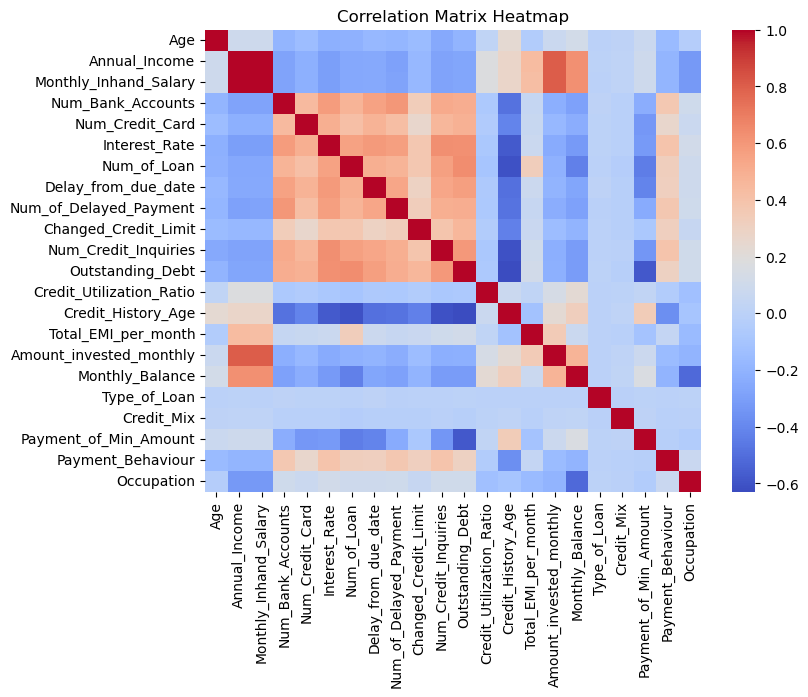

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(X_scaled.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [27]:
from scipy import stats

z_scores = stats.zscore(X_scaled)
outliers = (z_scores > 3) | (z_scores < -3)
print(outliers.sum())


Age                            0
Annual_Income               1088
Monthly_Inhand_Salary       1055
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Outstanding_Debt             584
Credit_Utilization_Ratio      16
Credit_History_Age             0
Total_EMI_per_month         1356
Amount_invested_monthly     1616
Monthly_Balance             1703
Type_of_Loan                   0
Credit_Mix                     0
Payment_of_Min_Amount          0
Payment_Behaviour              0
Occupation                     0
dtype: int64


# **_Logistic Regression_**


In [8]:
from sklearn.preprocessing import LabelEncoder
credit['Type_of_Loan'] = LabelEncoder().fit_transform(credit['Type_of_Loan'])
credit['Credit_Mix'] = LabelEncoder().fit_transform(credit['Credit_Mix'])
credit['Payment_of_Min_Amount'] = LabelEncoder().fit_transform(credit['Payment_of_Min_Amount'])
credit['Payment_Behaviour'] = LabelEncoder().fit_transform(credit['Payment_Behaviour'])
credit['Occupation'] = LabelEncoder().fit_transform(credit['Occupation'])


In [9]:
y = credit['Credit_Score']
X = credit.drop('Credit_Score',axis=1)


In [10]:
X


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,4.0,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089
1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,4.0,1,809.98,31.944960,266.0,1,49.574949,21.465380,3,284.629162
2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,...,4.0,1,809.98,28.609352,267.0,1,49.574949,21.465380,4,331.209863
3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,...,4.0,1,809.98,31.377862,268.0,1,49.574949,21.465380,5,223.451310
4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,...,4.0,1,809.98,24.797347,269.0,1,49.574949,21.465380,1,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,23.0,...,3.0,1,502.38,34.663572,378.0,1,35.104023,24.028477,0,479.866228
99996,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,18.0,...,3.0,1,502.38,40.565631,379.0,1,35.104023,24.028477,1,496.651610
99997,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,27.0,...,3.0,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083
99998,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,20.0,...,3.0,1,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979


In [19]:
y


array([0, 0, 0, ..., 1, 2, 1])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

pred_prob=[]


**Scaling the Dataset and splitting data into training and testing data**


In [12]:
credit['Type_of_Loan'] = LabelEncoder().fit_transform(credit['Type_of_Loan'])
credit['Credit_Mix'] = LabelEncoder().fit_transform(credit['Credit_Mix'])
credit['Payment_of_Min_Amount'] = LabelEncoder().fit_transform(credit['Payment_of_Min_Amount'])
credit['Payment_Behaviour'] = LabelEncoder().fit_transform(credit['Payment_Behaviour'])
credit['Occupation'] = LabelEncoder().fit_transform(credit['Occupation'])
y = LabelEncoder().fit_transform(y)

columns_to_leave_unchanged = ["Type_of_Loan", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour","Occupation"]

columns_to_scale = [col for col in X.columns if col not in columns_to_leave_unchanged]

preprocessor = ColumnTransformer(
    transformers=[("scale", StandardScaler(), columns_to_scale)],
    remainder="passthrough",
)

X_scaled_ = preprocessor.fit_transform(X)

columns_after_scaling = columns_to_scale + columns_to_leave_unchanged

X_scaled = pd.DataFrame(X_scaled_, columns=columns_after_scaling)

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.20, random_state=101)


***Fitting the dataset in Logistic Regression Model***

In [13]:
logreg_model = LogisticRegression(random_state=101, multi_class='ovr',max_iter=100000)
logreg_model.fit(X_train, y_train)

predictions = logreg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
pred_prob.append(logreg_model.predict_proba(X_test))


Accuracy: 0.639


In [14]:
print("\nClassification Report:\n", classification_report(y_test, predictions))



Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.47      0.52      3629
           1       0.65      0.52      0.58      5711
           2       0.65      0.76      0.70     10660

    accuracy                           0.64     20000
   macro avg       0.62      0.58      0.60     20000
weighted avg       0.64      0.64      0.63     20000



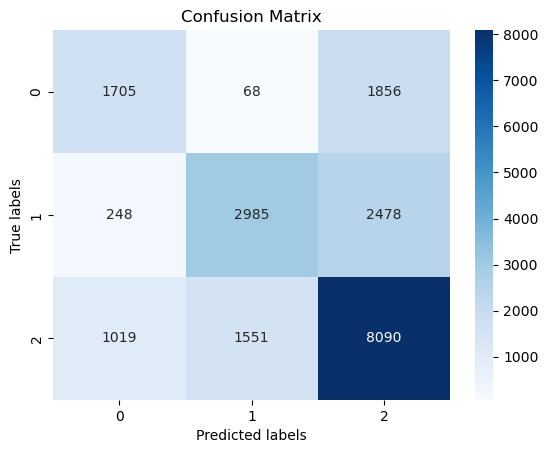

In [15]:
cm_test = confusion_matrix(y_test, predictions)
ax = plt.subplot()
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
plt.show()


# **_KNN Algorithm_**


Confusion Matrix for k=2 : 


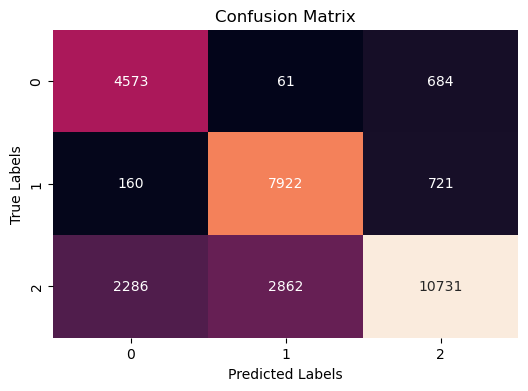

Confusion Matrix for k=3 : 


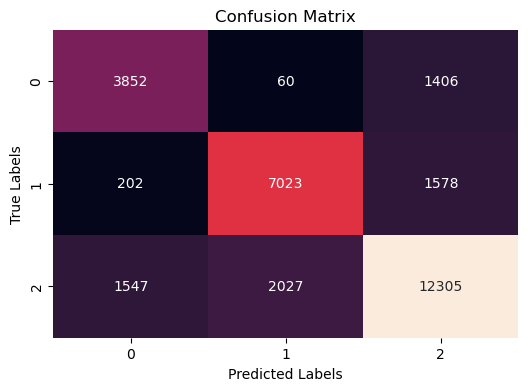

Confusion Matrix for k=4 : 


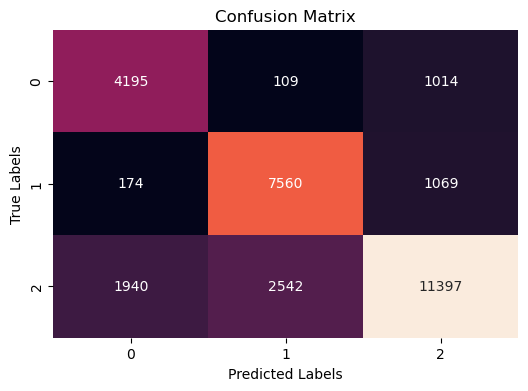

Confusion Matrix for k=5 : 


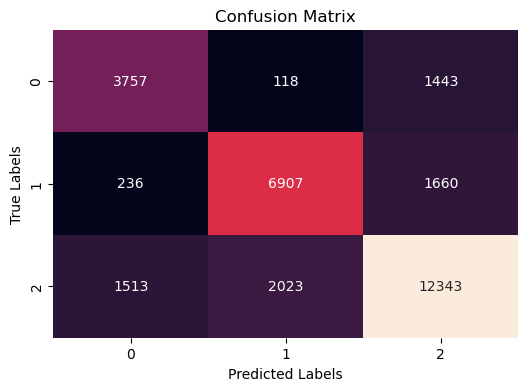

Confusion Matrix for k=6 : 


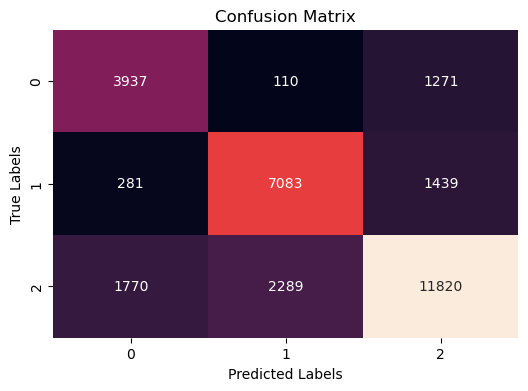

Confusion Matrix for k=7 : 


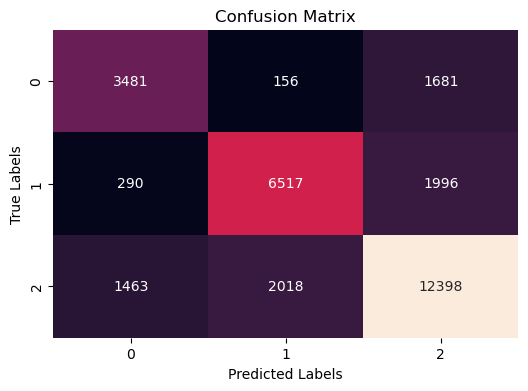

Confusion Matrix for k=8 : 


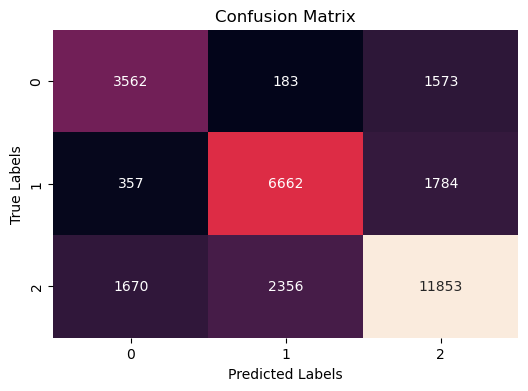

Confusion Matrix for k=9 : 


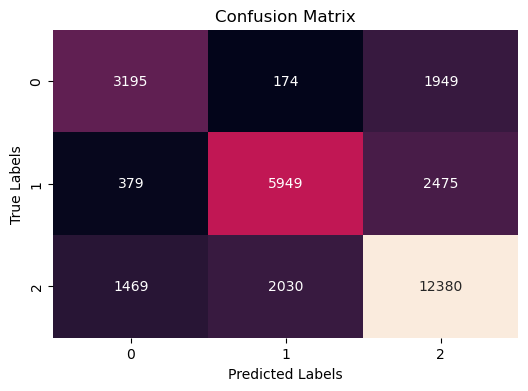

Confusion Matrix for k=10 : 


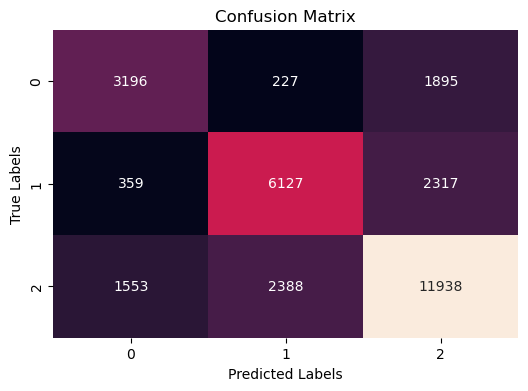

Confusion Matrix for k=11 : 


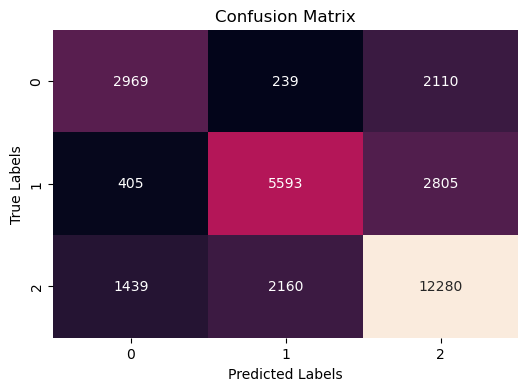

Confusion Matrix for k=12 : 


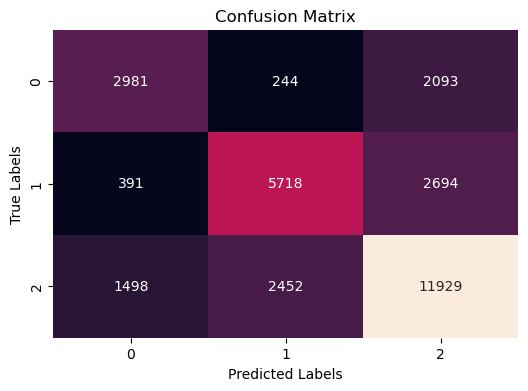

Confusion Matrix for k=13 : 


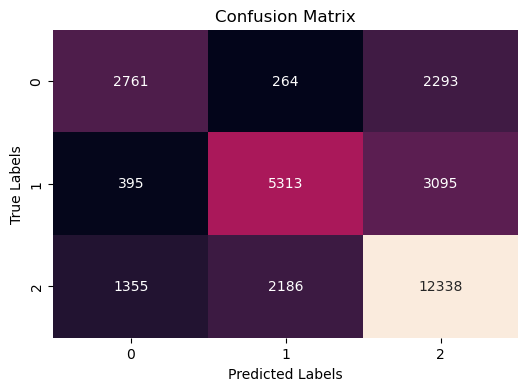

Confusion Matrix for k=14 : 


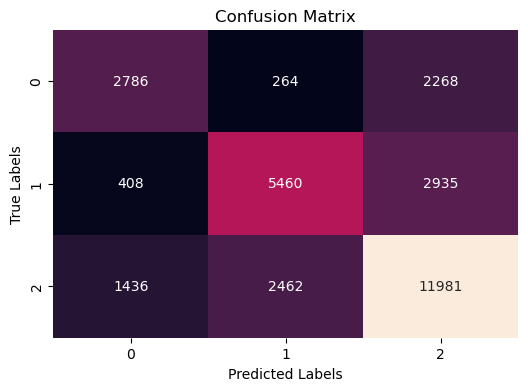

In [16]:
pred_classifier=[]
pred_accuracy=[]
error_rate=[]

X_train, X_test, y_train, y_test = train_test_split( X_scaled.values, credit['Credit_Score'].values, test_size=0.3, random_state=0)

for i in range(2,15):
    classifier = KNeighborsClassifier(n_neighbors = i) 
    classifier.fit(X_train, y_train) 
    
    prediction_i=classifier.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

    cm=confusion_matrix(y_test,prediction_i)
    print(f'Confusion Matrix for k={i} : ')
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix')
    plt.show()

    pred_accuracy.append(accuracy_score(y_test,prediction_i))
    pred_prob.append(classifier.predict_proba(X_test))


In [17]:
classifier = KNeighborsClassifier(n_neighbors = 2) 
classifier.fit(X_train, y_train) 

prediction_i=classifier.predict(X_test)
error_rate.append(np.mean(prediction_i != y_test))

for i in range(2,15):
    classifier = KNeighborsClassifier(n_neighbors = i) 
    classifier.fit(X_train, y_train) 
    
    prediction_i=classifier.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
    
    cm=confusion_matrix(y_test,prediction_i)
    print(f'Confusion Matrix for k={i} : \n {cm}')
    pred_prob.append(classifier.predict_proba(X_test))


Confusion Matrix for k=2 : 
 [[ 4573    61   684]
 [  160  7922   721]
 [ 2286  2862 10731]]
Confusion Matrix for k=3 : 
 [[ 3852    60  1406]
 [  202  7023  1578]
 [ 1547  2027 12305]]
Confusion Matrix for k=4 : 
 [[ 4195   109  1014]
 [  174  7560  1069]
 [ 1940  2542 11397]]
Confusion Matrix for k=5 : 
 [[ 3757   118  1443]
 [  236  6907  1660]
 [ 1513  2023 12343]]
Confusion Matrix for k=6 : 
 [[ 3937   110  1271]
 [  281  7083  1439]
 [ 1770  2289 11820]]
Confusion Matrix for k=7 : 
 [[ 3481   156  1681]
 [  290  6517  1996]
 [ 1463  2018 12398]]
Confusion Matrix for k=8 : 
 [[ 3562   183  1573]
 [  357  6662  1784]
 [ 1670  2356 11853]]
Confusion Matrix for k=9 : 
 [[ 3195   174  1949]
 [  379  5949  2475]
 [ 1469  2030 12380]]
Confusion Matrix for k=10 : 
 [[ 3196   227  1895]
 [  359  6127  2317]
 [ 1553  2388 11938]]
Confusion Matrix for k=11 : 
 [[ 2969   239  2110]
 [  405  5593  2805]
 [ 1439  2160 12280]]
Confusion Matrix for k=12 : 
 [[ 2981   244  2093]
 [  391  5718  26

In [18]:
for i in range(1,10):
  print("The accuracy for KNN model for k = {}".format(i+1))
  print(pred_accuracy[i-1])


The accuracy for KNN model for k = 2
0.7742
The accuracy for KNN model for k = 3
0.7726666666666666
The accuracy for KNN model for k = 4
0.7717333333333334
The accuracy for KNN model for k = 5
0.7669
The accuracy for KNN model for k = 6
0.7613333333333333
The accuracy for KNN model for k = 7
0.7465333333333334
The accuracy for KNN model for k = 8
0.7359
The accuracy for KNN model for k = 9
0.7174666666666667
The accuracy for KNN model for k = 10
0.7087
